--- 

---
# MovieLens Dataset 1M
---

---

### 1. Reading files

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
movies = pd.read_table('ml-1m/movies.dat', sep='::', header=None, names=['movie_id', 'title', 'genres'])
print movies.shape
movies.head()

(3883, 3)


C:\Users\Vova\Anaconda\lib\site-packages\ipykernel\__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
users = pd.read_table('ml-1m/users.dat', sep='::', names=['user_id', 'gender', 'age', 'occupation', 'zip'])
print users.shape
users.head()

(6040, 5)


C:\Users\Vova\Anaconda\lib\site-packages\ipykernel\__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [8]:
ratings = pd.read_table('ml-1m/ratings.dat', sep='::', header=None, names=['user_id', 'movie_id', 'rating', 'timestamp'])
print ratings.shape
ratings.head()

(1000209, 4)


C:\Users\Vova\Anaconda\lib\site-packages\ipykernel\__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [5]:
# We can calculate the fill rate of rating matrix
fill_rate = (1.0 * ratings.shape[0] / len(ratings.user_id.drop_duplicates()) / len(ratings.movie_id.drop_duplicates())) * 100
fill_rate

4.468362562231285

That means, not even 4.5% of all entries in the rating matrix are filled.

### 2. Tables merging and Data analysis

In [66]:
movielens = pd.merge(pd.merge(ratings, users), movies)
print movielens.shape
movielens.head()

(1000209, 10)


,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [20]:
movielens[['rating', 'age']].describe()

,rating,age
count,1000209.000000,1000209.000000
mean,3.581564,29.738314
std,1.117102,11.751983
min,1.000000,1.000000
25%,3.000000,25.000000
50%,4.000000,25.000000
75%,4.000000,35.000000
max,5.000000,56.000000


What we see:

- people, who watches movies, are less then 56 years old;

- most common age is less then 35;

- average age is about 30 years;

- average rating is more than 3.5 stars.

In [7]:
# Lets see which movie has how many ratings
movielens['title'].value_counts()

American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Princess

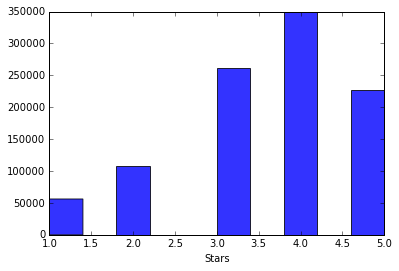

In [28]:
# Display the most common ratings
plt.hist(movielens.rating, bins=10, color='blue', alpha=0.8)
plt.xlabel("Stars")
plt.show()

What we see:

* people like a big part of movies and evaluate them from 3 to 5 stars.

In [32]:
# We are using DataFrame's pivot_table method that allow group data by column very easy. 
mean_ratings = movielens.pivot_table('rating', 'genres', 'gender', aggfunc='mean')

# We want to find the genres of movies by gender. 
# We can add a column to mean_ratings containing the difference in means, then sort by that.
mean_ratings['diff'] = mean_ratings['F'] - mean_ratings['M']
sorted_by_diff = mean_ratings.sort_values(by='diff')
sorted_by_diff.head(10)

gender,F,M,diff
genres,,,
Comedy|Film-Noir|Thriller,1.000000,2.250000,-1.250000
Crime|Mystery,2.687500,3.360656,-0.673156
Action|Adventure|Comedy|Horror,3.297297,3.909283,-0.611985
Action|Western,3.541667,4.144167,-0.602500
Action|Animation|Children's|Sci-Fi|Thriller|War,2.857143,3.433333,-0.576190
Action|Adventure|Drama|Thriller,2.956522,3.483146,-0.526624
Action|Comedy|Crime|Horror|Thriller,2.735714,3.232558,-0.496844
Adventure|Animation|Sci-Fi|Thriller,3.511111,3.980344,-0.469233
Drama|Romance|Sci-Fi,3.615385,4.040816,-0.425432


What we see:
* top 10 genres of movies that men find better.

In [44]:
# Let's find which movies do men and women most disagree on

# We have DataFrame with multi-level index,  
# therefore we must return new DataFrame with labeling information in the columns under the index names
movielens.reset_index('movie_id', inplace=True)

# We want to find the movies that are most divisive between male and female.
data1 = movielens.pivot_table(index=['movie_id', 'title'], columns='gender', values='rating', fill_value=0)
# 'diff' gives us the movies with rating difference and which were preferred by women
data1['diff'] = data1.M - data1.F
data1.head()

,gender,F,M,diff
movie_id,title,,,
1,Toy Story (1995),4.187817,4.130552,-0.057265
2,Jumanji (1995),3.278409,3.175238,-0.103171
3,Grumpier Old Men (1995),3.073529,2.994152,-0.079377
4,Waiting to Exhale (1995),2.976471,2.482353,-0.494118
5,Father of the Bride Part II (1995),3.212963,2.888298,-0.324665


C:\Users\Vova\Anaconda\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: order is deprecated, use sort_values(...)
  from ipykernel import kernelapp as app
C:\Users\Vova\Anaconda\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: order is deprecated, use sort_values(...)


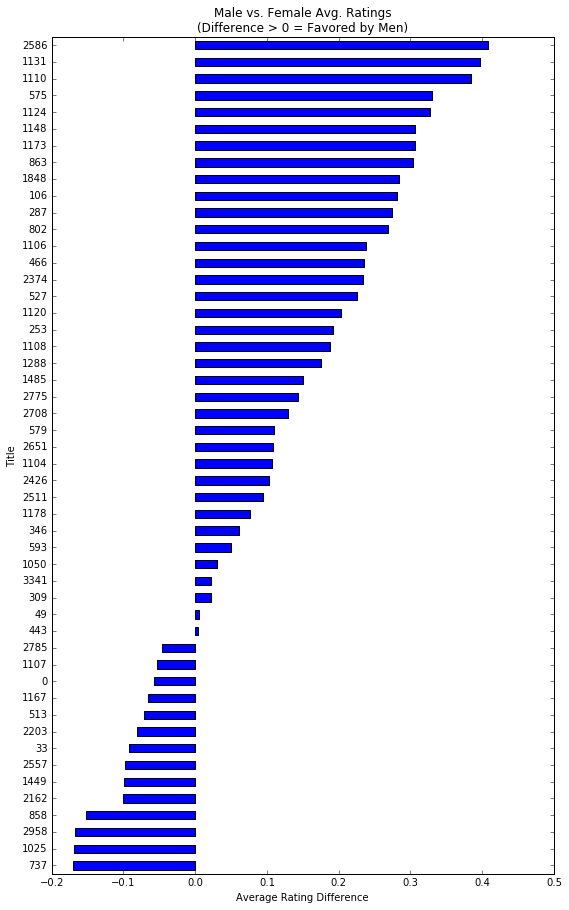

In [46]:
# Let's choose top 50 movies 
most_50 = movielens.groupby('movie_id').size().order(ascending=False)[:50]
data1.reset_index('movie_id', inplace=True)

disagreements = data1[data1.movie_id.isin(most_50.index)]['diff']
disagreements.order().plot(kind='barh', figsize=[9, 15])
plt.title('Male vs. Female Avg. Ratings\n(Difference > 0 = Favored by Men)')
plt.ylabel('Title')
plt.xlabel('Average Rating Difference');

In [51]:
# Find which occupation watches which Genre the most

# Values of occupation we found here: https://github.com/pydata/pydata-book/tree/master/ch02/movielens
occupation = ["Genres", "other", "academic/educator", "artist", "clerical/admin", "college/grad student", 
              "customer service", "doctor/health care", "executive/managerial", "farmer", "homemaker",
              "K-12 student", "lawyer", "programmer", "retired", "sales/marketing", "scientist", "self-employed",
              "technician/engineer", "tradesman/craftsman", "unemployed", "writer"]

# Get data with occupation values group by Genres
genres_by_occupation = movielens.pivot_table('rating', index='genres', columns='occupation', aggfunc='count')

# The next function allow rename values of genres by first category.
def group_genres(df):
    for i,item in enumerate(df.index):
        word = item.partition('|')
        df['Genres1'] = word[0]
    for i,item in enumerate(df.index):
        word = item.partition('|')
        df['Genres1'][i] = word[0]
        
# Call a function
group_genres(genres_by_occupation)

# Group by genres
genres_by_occupation = genres_by_occupation.groupby("Genres1", as_index=False)
genres_by_occupation = genres_by_occupation.aggregate(sum)
genres_by_occupation

C:\Users\Vova\Anaconda\lib\site-packages\ipykernel\__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


occupation,Genres1,0,1,2,3,4,5,6,7,8,...,11,12,13,14,15,16,17,18,19,20
0,Action,32957,18673,11277,7078,35152,6493,8601,28863,868,...,4793,17136,2773,13559,6484,11863,23324,3188,3706,12504
1,Adventure,5631,3499,2060,1243,5539,1050,1525,4442,176,...,875,2674,632,1986,1075,2002,3550,616,613,2604
2,Animation,4771,2809,1845,1146,6032,804,1338,2935,115,...,624,2224,279,1472,858,1389,2744,294,454,2274
3,Children's,2878,1744,962,708,3097,434,786,2002,84,...,356,1089,221,833,452,814,1526,239,383,1269
4,Comedy,36042,24038,14313,9420,37321,6019,10419,27988,687,...,6076,14860,3608,14058,5934,12517,18097,3179,4199,17664
5,Crime,4980,3213,1933,1238,4957,724,1393,4158,78,...,925,2041,502,2080,823,1768,2512,508,574,2559
6,Documentary,1010,683,493,251,818,80,257,615,8,...,154,347,87,254,135,366,306,63,117,665
7,Drama,26638,21709,11734,6904,25186,3451,8836,22740,453,...,4551,10679,3957,9908,4839,9732,12555,2079,2896,14047
8,Fantasy,99,55,36,21,85,21,24,82,4,...,13,71,9,36,32,33,88,7,15,40
9,Film-Noir,1160,978,529,364,842,168,333,982,21,...,282,607,227,408,244,404,646,101,137,731


In [53]:
# Sort by "other" occupation to see with movies they prefer
sorted_by_other = genres_by_occupation.sort_values(by=0)
sorted_by_other.index = range(len(sorted_by_other))
# Give the columns right names by occupations
sorted_by_other.columns = occupation
sorted_by_other

,Genres,other,academic/educator,artist,clerical/admin,college/grad student,customer service,doctor/health care,executive/managerial,farmer,...,lawyer,programmer,retired,sales/marketing,scientist,self-employed,technician/engineer,tradesman/craftsman,unemployed,writer
0,Fantasy,99,55,36,21,85,21,24,82,4,...,13,71,9,36,32,33,88,7,15,40
1,War,106,98,28,23,81,13,39,143,2,...,27,49,34,39,36,76,87,19,6,67
2,Romance,384,311,145,128,333,37,130,304,2,...,52,135,47,127,55,137,136,15,49,204
3,Western,751,442,273,183,477,171,192,820,9,...,179,240,135,259,145,352,438,107,80,340
4,Musical,827,825,450,302,684,122,313,783,6,...,179,306,195,286,140,314,409,53,108,484
5,Documentary,1010,683,493,251,818,80,257,615,8,...,154,347,87,254,135,366,306,63,117,665
6,Film-Noir,1160,978,529,364,842,168,333,982,21,...,282,607,227,408,244,404,646,101,137,731
7,Mystery,1367,984,496,391,1082,159,383,1082,17,...,208,574,212,536,250,484,789,120,153,673
8,Sci-Fi,1381,927,544,308,1366,251,370,1145,44,...,218,951,173,490,313,587,1047,125,195,736
9,Thriller,2423,1444,839,634,2157,396,720,2066,24,...,346,994,232,993,383,896,1218,265,265,1028


What we see:

- almost all occupations prefer comedy, action or drama;

- the least popular are Fantasy and War.

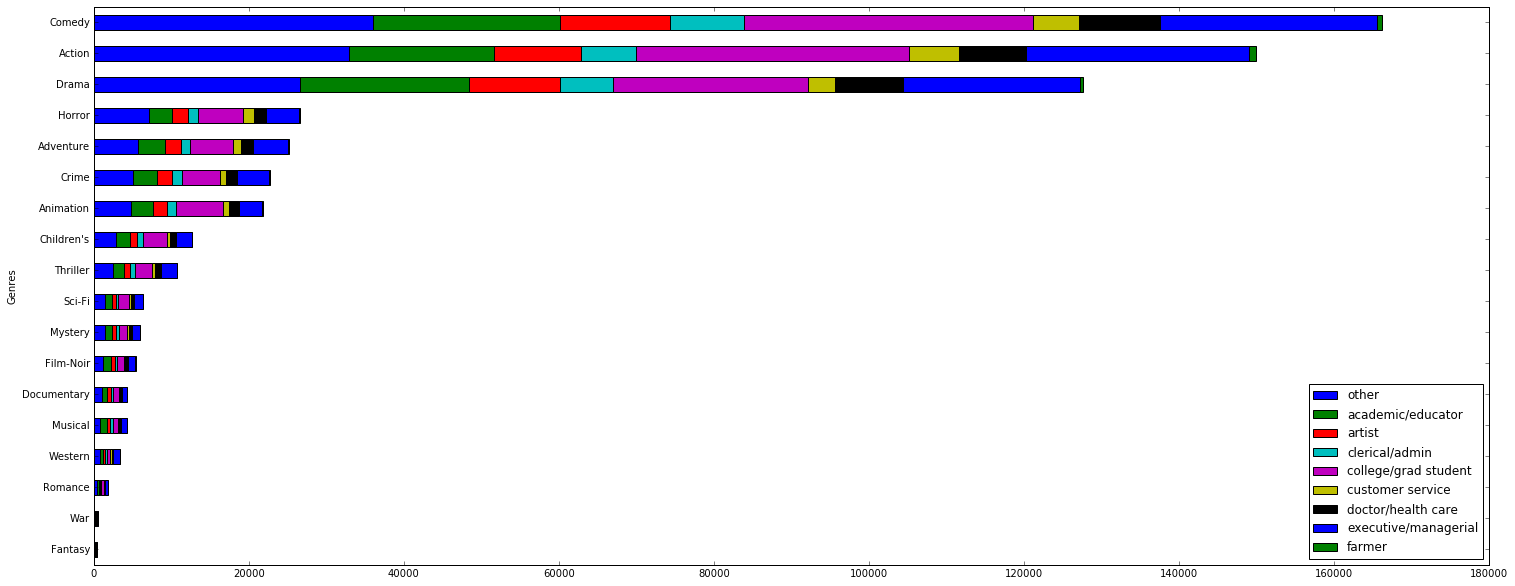

In [54]:
# let's choose 10 occupation and build plot by number of ratings for each genre
occupation1 = occupation[1:10]
df1 = sorted_by_other[occupation1]
# we are plotting with help of pandas method "plot()"
df1.plot(kind='barh', figsize=[25, 10], x=sorted_by_other.Genres, stacked=True);

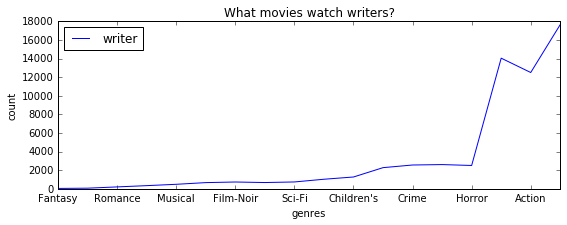

In [55]:
# Let's see what films watch writers?
df = sorted_by_other[['Genres', 'writer']]

df.plot(kind='line', x=df.Genres, figsize=[9, 3])
plt.title('What movies watch writers?')
plt.ylabel('count')
plt.xlabel('genres');

In [68]:
# Which age group is ranking which genre the most?

# We are dividing people in 8 group by age.
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59']
# Add new column with age_group
movielens['age_group'] = pd.cut(movielens['age'], range(0, 61, 10), right=False, labels=labels)
print movielens[['age', 'age_group']].drop_duplicates()[:20]

    age age_group
0     1       0-9
1    56     50-59
2    25     20-29
4    50     50-59
5    18     10-19
9    45     40-49
20   35     30-39


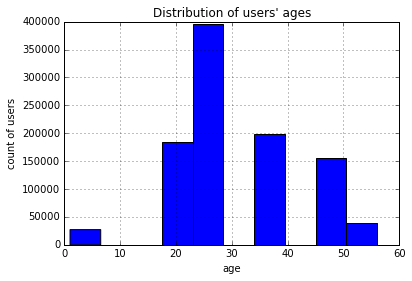

In [69]:
# let's look at how age is distributed amongst our users
# Call pandas' "hist" on the column to produce a histogram
movielens.age.hist(bins=10)
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('age');

In [70]:
# Now we are comparing ratings across age groups
movielens.groupby('age_group').agg({'rating': [np.size, np.mean]})

rating          
             size      mean
age_group                  
0-9         27211  3.549520
10-19      183536  3.507573
20-29      395556  3.545235
30-39      199003  3.618162
40-49       83633  3.638062
50-59      111270  3.732677

What we see:

- old users are more critical than other.

In [71]:
# Group our data by Genres and Age_group
age_genres = movielens.pivot_table('rating', index='genres', columns='age_group', aggfunc='count')

# Call a function to join genres
group_genres(age_genres)

# Aggregate genres by sum of each age group
age_genres_count = age_genres.groupby("Genres1", as_index=False)
age_genres_count = age_genres_count.aggregate(sum)

age_genres_count

C:\Users\Vova\Anaconda\lib\site-packages\ipykernel\__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


age_group,Genres1,0-9,10-19,20-29,30-39,40-49,50-59
0,Action,6578,50186,105678,50503,19357,25155
1,Adventure,1456,8260,16064,8981,3862,5007
2,Animation,2163,8786,13844,6981,2504,2658
3,Children's,1370,4612,7516,4332,1801,1860
4,Comedy,7869,53112,111568,53727,22183,28464
5,Crime,760,6998,15503,7114,3054,4420
6,Documentary,107,908,3019,1466,601,716
7,Drama,4154,32872,80183,42418,19785,29215
8,Fantasy,18,122,327,186,63,74
9,Film-Noir,172,1057,3311,2226,982,1595


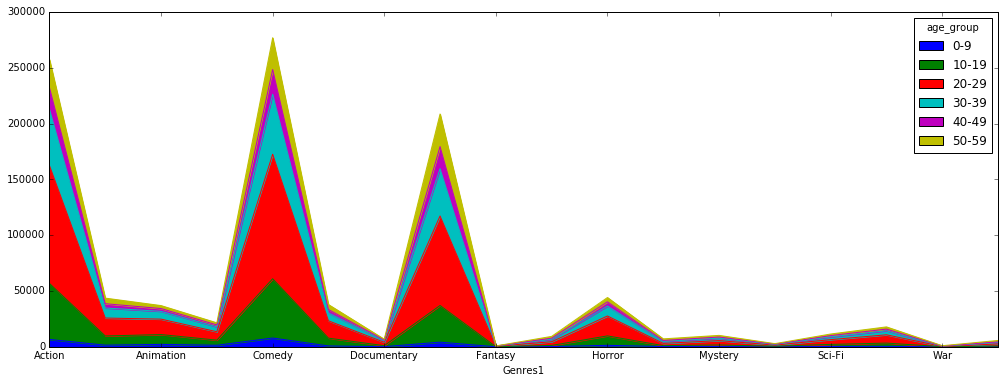

In [73]:
# we are using pandas area-plot for better visualization
age_genres_count.plot(kind='area', x=age_genres_count.Genres1, figsize=[17, 6]);

In [76]:
# Which movies are most highly rated?

# Group data by title and fing rating's mean
movie_stats = movielens.groupby('title').agg({'rating': [np.size, np.mean]})
movie_stats.sort_values(by=[('rating', 'mean')], ascending=False).head()

rating     
                           size mean
title                               
Ulysses (Ulisse) (1954)       1    5
Lured (1947)                  1    5
Follow the Bitch (1998)       1    5
Bittersweet Motel (2000)      1    5
Song of Freedom (1936)        1    5

In [83]:
# For better analysis we only look at movies that have been rated at least 100 times
atleast_100 = movie_stats['rating']['size']>= 100
movie_stats[atleast_100].sort_values(by=[('rating', 'mean')], ascending=False)[:15]

rating          
                                                     size      mean
title                                                              
Seven Samurai (The Magnificent Seven) (Shichini...    628  4.560510
Shawshank Redemption, The (1994)                     2227  4.554558
Godfather, The (1972)                                2223  4.524966
Close Shave, A (1995)                                 657  4.520548
Usual Suspects, The (1995)                           1783  4.517106
Schindler's List (1993)                              2304  4.510417
Wrong Trousers, The (1993)                            882  4.507937
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)         470  4.491489
Raiders of the Lost Ark (1981)                       2514  4.477725
Rear Window (1954)                                   1050  4.476190
Paths of Glory (1957)                                 230  4.473913
Star Wars: Episode IV - A New Hope (1977)            2991  4.453694
Third Man, The (1949)                                 480  4.452083
Dr. Strangelove or: How I Learned to Stop Worry...   1367  4.449890
Wallace & Gromit: The Best of Aardman Animation...    438  4.426941

### 3. Matrix factorization

At first, let's demonstrate the work of factorization of matrix on the small matrix with 4 movies and 5 users

||Movie1|Movie2|Movie3|Movie4|
|----|----|----|----|----|
|**User1**|5|3|-|1|
|**User2**|4|-|-|1|
|**User3**|1|1|-|5|
|**User4**|2|-|-|4|
|**User5**|-|1|5|4|

In [2]:
# Algorithm for factorization of a matrix (including regularization to avoid overfitting)
# Algorithm is available here http://cyber.sci-hub.io/MTAuMTEwOS9yaXZmLjIwMTIuNjE2OTgzMQ==/nguyen2012.pdf
from numba import jit   # We use this module to compile Python code to the byte code 

@jit
def RNMF(R, P, Q, K, steps=10000, alpha=0.001, beta=0.002):
    """
    :params:
        R     : a matrix that should be factorized, dimension n x m
        K     : the number of latent features
        steps : the maximum number of steps to perform the optimisation
        alpha : the learning rate
        beta  : the regularization parameter
    Returns:
        the final matrices P and Q
    """
    n, m = R.shape   # Define dimentions of the matrix R
    Q = Q.T   # Transpose matrix Q 
    s = len(np.where(R > 0)[0])  # The amount of non-zero elements
    for step in xrange(steps):
        for i in xrange(n):       # for each user ...
            for j in xrange(m):   # for each movie ...
                if R[i][j] > 0:
                    eij = R[i][j] - np.dot(P[i,:],Q[:,j])
                    for k in xrange(K):
                        P[i][k] += alpha * (eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] += alpha * (eij * P[i][k] - beta * Q[k][j])
        e = 0
        for i in xrange(n):
            for j in xrange(m):
                if R[i][j] > 0:
                    e += pow(R[i][j] - np.dot(P[i,:],Q[:,j]), 2)
        if np.sqrt(e/s) < 0.01:
            break
    print step
    return P, Q

In [7]:
# The rating matrix from above table
R = np.array([[5,3,0,1],
              [4,0,0,1],
              [1,1,0,5],
              [2,0,0,4],
              [0,1,5,4],
             ])
n, m = R.shape   # Define dimentions of the matrix R
# Amount of latent features 
k = 3
# Create some random matrices nxk and mxk
P = np.random.rand(n, k)
Q = np.random.rand(m, k)
# Look at random matrices P and Q
print P
print
print Q

# Set numpy print parameters
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

# Calculate factorization matrix
fP, fQ = RNMF(R, P, Q, k)
factR = np.dot(fP, fQ)

print "\nInitial matrix:\n", R
print "\nFactorized matrix:\n", factR

[[ 0.94838395  0.75774947  0.22898755]
 [ 0.76857195  0.79201554  0.33245165]
 [ 0.70525505  0.9372655   0.55059225]
 [ 0.14652157  0.01276097  0.80482247]
 [ 0.06426041  0.42171635  0.71933128]]

[[ 0.72231403  0.95114857  0.31623103]
 [ 0.9731598   0.30617387  0.22572854]
 [ 0.27217907  0.28683802  0.41173408]
 [ 0.40939474  0.16642415  0.69574351]]
2399


Initial matrix:
[[5 3 0 1]
 [4 0 0 1]
 [1 1 0 5]
 [2 0 0 4]
 [0 1 5 4]]

Factorized matrix:
[[ 4.998  2.992  2.879  1.001]
 [ 3.995  2.229  2.633  1.   ]
 [ 1.01   0.979  5.268  4.994]
 [ 1.994  1.502  4.646  3.996]
 [ 1.965  1.022  4.991  4.   ]]


C:\Users\Vova\Anaconda\lib\site-packages\numba\dataflow.py:297: RuntimeWarning: Python2 style print partially supported.  Please use Python3 style print.
  "Python3 style print.", RuntimeWarning)


In [3]:
# Count MSE (mean square error) and MAE (mean absolute error)
def mse(train, pred):
    # Find indeces of nonzero elements of R matrix
    ind = tuple(zip(*np.argwhere(train > 0)))
    return np.sqrt(np.sum((train[ind[0], ind[1]] - pred[ind]) ** 2) / len(ind[0]))

def mae(train, pred):
    # Find indeces of nonzero elements of R matrix
    ind = tuple(zip(*np.argwhere(train > 0)))
    return np.sum(np.abs(train[ind] - pred[ind])) / len(ind[0])

print mse(R, factR)
print mae(R, factR)

In [9]:
# Let's replace some zero rating and check how sensitive is the algorithm to overfitting
R2 = np.array([[5,3,0,1],
               [4,0,3,1],  # <- the change is made here
               [1,1,0,5],
               [2,0,0,4],
               [0,1,5,4],
              ])
# Calculate factorization matrix
fP2, fQ2 = RNMF(R2, P, Q, k)
factR2 = np.dot(fP2, fQ2)

print "Initial matrix:\n", R2
print "\nInitial factorized matrix:\n", factR
print "\nFactorized matrix:\n", factR2

1076

Initial matrix:
[[5 3 0 1]
 [4 0 3 1]
 [1 1 0 5]
 [2 0 0 4]
 [0 1 5 4]]

Initial factorized matrix:
[[ 4.998  2.992  2.879  1.001]
 [ 3.995  2.229  2.633  1.   ]
 [ 1.01   0.979  5.268  4.994]
 [ 1.994  1.502  4.646  3.996]
 [ 1.965  1.022  4.991  4.   ]]

Factorized matrix:
[[ 4.991  3.001  3.254  0.992]
 [ 4.006  2.226  2.979  1.022]
 [ 1.001  0.998  5.254  4.998]
 [ 1.998  1.522  4.737  3.998]
 [ 1.875  0.999  5.008  3.985]]


In [10]:
# Let's add a new line for some new user and look at reccomendations for him
R3 = np.array([[5,3,0,1],
              [4,0,0,1],
              [1,1,0,5],
              [2,0,0,4],
              [0,1,5,4],
              [0,0,0,0]   # <- new row
             ])
# Extend matrix P
P3 = np.vstack([P, np.random.rand(1, k)])

# Look at extended matrix P
print "P3:\n", P3

# Calculate factorization matrix
fP3, fQ3 = RNMF(R3, P3, Q, k)
factR3 = np.dot(fP3, fQ3)

print "Initial matrix:\n", R3
print "\nInitial factorized matrix:\n", factR
print "\nFactorized matrix:\n", factR3

P3:
[[ 1.775  1.406 -0.035]
 [ 1.211  1.357  0.089]
 [ 0.435  0.391  2.147]
 [ 0.795  0.619  1.6  ]
 [ 0.263  1.084  1.643]
 [ 0.567  0.705  0.032]]
0

Initial matrix:
[[5 3 0 1]
 [4 0 0 1]
 [1 1 0 5]
 [2 0 0 4]
 [0 1 5 4]
 [0 0 0 0]]

Initial factorized matrix:
[[ 4.998  2.992  2.879  1.001]
 [ 3.995  2.229  2.633  1.   ]
 [ 1.01   0.979  5.268  4.994]
 [ 1.994  1.502  4.646  3.996]
 [ 1.965  1.022  4.991  4.   ]]

Factorized matrix:
[[ 4.991  3.001  3.254  0.993]
 [ 4.006  2.226  2.979  1.022]
 [ 1.001  0.998  5.254  4.998]
 [ 1.998  1.522  4.737  3.998]
 [ 1.875  0.999  5.008  3.985]
 [ 1.985  1.071  1.468  0.474]]


It is easily to see that after addition of a new row with zeros the first factorized matrix was almost not changed in result of overfitting. So, the current algorithm is very stable to overfitting and give good reccommendations even for a new "cold" user.

Let's a little bit change the above function `RNMF` with factorization algorithm and work with the MovieLens dataset

In [3]:
@jit
def RNMF(R, K, steps=10000, alpha=0.001, beta=0.002):
    """
    :params:
        R     : a matrix that should be factorized, dimension n x m
        K     : the number of latent features
        steps : the maximum number of steps to perform the optimisation
        alpha : the learning rate
        beta  : the regularization parameter
    Returns:
        the final matrices P and Q
    """
    n, m = R.shape   # Define dimentions of the matrix R
    # Create some random matrices nxk and mxk
    P = np.random.rand(n, K)
    Q = np.random.rand(m, K)
    Q = Q.T   # Transpose matrix Q 
    s = len(np.where(R > 0)[0])
    for step in xrange(steps):
        for i in xrange(n):       # for each user ...
            for j in xrange(m):   # for each movie ...
                if R[i][j] > 0:
                    eij = R[i][j] - np.dot(P[i,:],Q[:,j])
                    for k in xrange(K):
                        P[i][k] += alpha * (eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] += alpha * (eij * P[i][k] - beta * Q[k][j])
        e = 0
        for i in xrange(n):
            for j in xrange(m):
                if R[i][j] > 0:
                    e += pow(R[i][j] - np.dot(P[i,:],Q[:,j]), 2)
        if np.sqrt(e/s) < 0.01:
            break
    return P, Q

def getFM(P, Q, left_bound, right_bound, err=0.49):
    """
    :params:
        P, Q         : latent features matrices
        left_bound   : the minimal possible value of the rating
        right_bound  : the maximal possible value of the rating
        err          : available declination from `left_bound` and `right_bound`
    Returns:
        the factorized matrix FM
    """
    FM = np.dot(fP, fQ)
    n, m = FM.shape 
    for i in xrange(n):
        for j in xrange(m):
            if left_bound-err > FM[i][j]:
                FM[i][j] = left_bound - err
            elif right_bound+err-err < FM[i][j]:
                FM[i][j] = right_bound + err
    return FM

In [6]:
# Putting "ratings" DataFrame data into a massive matrix
data = np.zeros([np.max(ratings.user_id), np.max(ratings.movie_id)])
# Repalce the empty values into zeros
for d in ratings.values:
    data[d[0]-1, d[1]-1] = d[2]
    
print "data", data.shape, "\n", data[:10]

# Let's separate those users who voted at least 500 times
data500 = []
for i in xrange(data.shape[0]):
    nonzero = np.count_nonzero(data[i, :])
    if nonzero >= 500:
        data500.append(data[i, :])

data500 = np.array(data500)

print "data500 =", data500.shape

data (6040, 3952) 
[[ 5.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 4.  0.  0. ...,  0.  0.  0.]
 [ 5.  0.  0. ...,  0.  0.  0.]
 [ 5.  5.  0. ...,  0.  0.  0.]]
data500 = (399, 3952)


In [ ]:
from time import time
start = time()

fP, fQ = RNMF(data500[:, :25], 10, alpha=0.001, beta=0.001)
FM = getFM(fP, fQ, 1, 5)

print "Initial matrix:\n", data500[:10, :10]
print "\nFactorized matrix:\n", FM[:10, :10]
dur = time() - start
print "\nElapsed time {} min {} sec.".format(dur//60, round(dur%60, 1))
print "MSE:", mse(R, factR)
print "MAE:", mae(R, factR)

This matrix was calculated about an hour.

In [9]:
np.savetxt('FM.txt', FM)
FM = np.genfromtxt('FM.txt', delimiter=" ")
FM

array([[ 3.98832623,  2.98704647,  3.32689648, ...,  2.78830666,
         2.9820247 ,  3.6418983 ],
       [ 5.49      ,  4.99382584,  2.66000546, ...,  1.94740068,
         3.2065389 ,  4.99917126],
       [ 3.00054858,  2.74175554,  1.85298373, ...,  2.72380695,
         3.47129175,  2.08246718],
       ..., 
       [ 3.06729313,  2.96960571,  3.00529502, ...,  3.08896894,
         5.49      ,  1.42015826],
       [ 3.9409036 ,  3.34654652,  2.01022246, ...,  1.72583627,
         3.57714395,  3.00805023],
       [ 1.81533801,  3.00278336,  0.51      , ...,  1.8167655 ,
         1.96940019,  3.98231028]])

Based on factorization matrix we can add recommendations now

In [147]:
# This function returns the list of `topn` movies IDs
def get_recommendations(user_id, data, fact_matrix, topn=10):
    # Reset movies which user with "user_id" has already seen
    n = len(fact_matrix[0])
    for i in xrange(n):
        if data[user_id, i] != 0.0:
            fact_matrix[user_id, i] = 0.0
    topn_movies = np.argsort(fact_matrix[user_id, :])[-topn:]
    return topn_movies

# This function returns the list of `topn` movies titles
def get_movies_by_id(m):
    m = map(lambda x: x+1, m)   # because the numeration starts from 1 in the DataFrames
    return movies[movies["movie_id"].isin(m)]["title"].values

In [114]:
# Let's define the ID of the first user in `data500` matrix
for i in xrange(data.shape[0]):
    if (data[i] == data500[0]).all():
        ind = i
        break
print ind

47


In [148]:
# And display recommended movies
rec_movies_ids = get_recommendations(0, data500, FM, topn=10)
print rec_movies_ids

rec_movies = get_movies_by_id(rec_movies_ids)
rec_movies

[17 19  8  3 22 11  7 12  2 21]


array(['Grumpier Old Men (1995)', 'Waiting to Exhale (1995)',
       'Tom and Huck (1995)', 'Sudden Death (1995)',
       'Dracula: Dead and Loving It (1995)', 'Balto (1995)',
       'Four Rooms (1995)', 'Money Train (1995)', 'Copycat (1995)',
       'Assassins (1995)'], dtype=object)

In [149]:
# Let's look on data for these movies on the `movies` DataFrame
movies[movies['movie_id'].isin(rec_movies_ids)]

,movie_id,title,genres
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
10,11,"American President, The (1995)",Comedy|Drama|Romance
11,12,Dracula: Dead and Loving It (1995),Comedy|Horror
16,17,Sense and Sensibility (1995),Drama|Romance
18,19,Ace Ventura: When Nature Calls (1995),Comedy
20,21,Get Shorty (1995),Action|Comedy|Drama
21,22,Copycat (1995),Crime|Drama|Thriller


In [150]:
# Look how many times these movies were watched
movielens[movielens.movie_id.isin(rec_movies_ids)].groupby('title')['user_id'].agg('count')

title
Ace Ventura: When Nature Calls (1995)     389
American President, The (1995)           1033
Copycat (1995)                            378
Dracula: Dead and Loving It (1995)        160
Get Shorty (1995)                        1356
Grumpier Old Men (1995)                   478
Jumanji (1995)                            701
Sabrina (1995)                            458
Sense and Sensibility (1995)              835
Tom and Huck (1995)                        68
Name: user_id, dtype: int64

What we see:

* Many films are related to Comedy genre or to mixed genres Comedy + Drama or Comedy + Romance
* This user also likes Adventure, Action and movies for Children
* Recommended movies are frequently watched films; it is because we choose most active users (with many ratings)

In [115]:
# Let's look at all movies which has ever seen the selected user
movies47 = movielens[movielens.user_id == ind+1] # because the numeration starts from 1 in the DataFrames
movies47

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,age_group
14,48,1193,4,977975061,M,25,4,92107,One Flew Over the Cuckoo's Nest (1975),Drama,20-29
2256,48,914,3,978059754,M,25,4,92107,My Fair Lady (1964),Musical|Romance,20-29
4220,48,2355,4,977976209,M,25,4,92107,"Bug's Life, A (1998)",Animation|Children's|Comedy,20-29
5924,48,1197,3,977975030,M,25,4,92107,"Princess Bride, The (1987)",Action|Adventure|Comedy|Romance,20-29
8229,48,1287,3,978064399,M,25,4,92107,Ben-Hur (1959),Action|Adventure|Drama,20-29
8933,48,2804,3,978060473,M,25,4,92107,"Christmas Story, A (1983)",Comedy|Drama,20-29
10284,48,594,4,978059313,M,25,4,92107,Snow White and the Seven Dwarfs (1937),Animation|Children's|Musical,20-29
11057,48,919,4,978059730,M,25,4,92107,"Wizard of Oz, The (1939)",Adventure|Children's|Drama|Musical,20-29
12770,48,595,3,977976188,M,25,4,92107,Beauty and the Beast (1991),Animation|Children's|Musical,20-29
14400,48,2918,4,978060880,M,25,4,92107,Ferris Bueller's Day Off (1986),Comedy,20-29


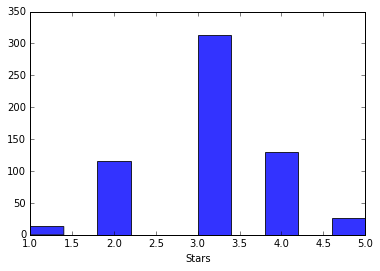

In [135]:
# Display the most common ratings
plt.hist(movies47.rating, bins=10, color='blue', alpha=0.8)
plt.xlabel("Stars")
plt.show()

What we see:

* the selected user is very strict and difficult for analysis

* the most amount of movies were marked with 3 

In [122]:
# Let's look wich genres see the selected user
movies47.pivot_table(index='genres', columns='user_id', values='rating', aggfunc='count')\
        .sort_values(by=[48], ascending=False).head(15)

user_id,48
genres,
Comedy,83
Drama,33
Comedy|Romance,26
Comedy|Drama,20
Action|Thriller,20
Children's|Comedy,18
Action|Adventure|Sci-Fi,16
Action,12
Action|Sci-Fi,11


In [136]:
movies47.pivot_table(index='genres', values='rating', aggfunc=[np.sum, np.mean, max]) \
        .sort_values(by=['sum'], ascending=False).head(15)

,sum,mean,max
genres,,,
Comedy,227,2.734940,4
Drama,108,3.272727,4
Comedy|Romance,81,3.115385,4
Action|Thriller,64,3.200000,5
Comedy|Drama,62,3.100000,5
Action|Adventure|Sci-Fi,46,2.875000,5
Children's|Comedy,44,2.444444,4
Action,37,3.083333,4
Drama|Romance,36,3.600000,5


What we see:

* the selected user watch Comedy, Drama, Action genres and mixins of these genres as we have obtained from factorization matrix

* the average rating of most watched genre categories is not high, but let's look at predicted ratings for recommended movies:

In [151]:
for i in xrange(len(FM[0])):
    if data500[0, i] != 0.0:
        FM[0, i] = 0.0
FM[0]

array([ 0.   ,  0.   ,  3.327,  2.712,  0.   ,  0.   ,  0.   ,  3.239,
        2.537,  0.   ,  0.   ,  2.836,  3.245,  0.   ,  0.   ,  0.   ,
        0.   ,  1.605,  0.   ,  2.225,  0.   ,  4.312,  2.788,  0.   ,  0.   ])

* it is fully corresponds to the seen picture

* more over, we have taken into account only the 11 movies of the selected user to make predictions. Obtained results is completely coincides with respective rows.

In [140]:
movies47[movies47['movie_id'] <= 25]

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,age_group
41642,48,1,4,977975909,M,25,4,92107,Toy Story (1995),Animation|Children's|Comedy,20-29
153551,48,21,3,978145556,M,25,4,92107,Get Shorty (1995),Action|Comedy|Drama,20-29
247831,48,6,4,977976243,M,25,4,92107,Heat (1995),Action|Crime|Thriller,20-29
309247,48,24,3,978032413,M,25,4,92107,Powder (1995),Drama|Sci-Fi,20-29
340096,48,17,4,977975845,M,25,4,92107,Sense and Sensibility (1995),Drama|Romance,20-29
432309,48,2,3,978064964,M,25,4,92107,Jumanji (1995),Adventure|Children's|Fantasy,20-29
433909,48,7,4,978013413,M,25,4,92107,Sabrina (1995),Comedy|Romance,20-29
579182,48,10,4,978013024,M,25,4,92107,GoldenEye (1995),Action|Adventure|Thriller,20-29
766574,48,5,3,978013996,M,25,4,92107,Father of the Bride Part II (1995),Comedy,20-29
879318,48,15,2,978066555,M,25,4,92107,Cutthroat Island (1995),Action|Adventure|Romance,20-29


--- 

---
# Book-Crossing Dataset
---

---

### 1. Reading files

In [4]:
books = pd.read_csv('book-crossing/BX-Books.csv', skiprows=1, sep=';',
                    names=['book_id', 'title', 'author', 'year', 'publisher', 'url1', 'url2', 'url3'])
books.drop(['url1', 'url2', 'url3'], axis=1, inplace=True)
print books.shape
books.head()

(271379, 5)


C:\Python27\lib\site-packages\pandas\io\parsers.py:1170: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


,book_id,title,author,year,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [5]:
users = pd.read_csv('book-crossing/BX-Users.csv', skiprows=1, sep=';', names=['user_id', 'location', 'age'])
print users.shape
users.head()

(278858, 3)


,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
ratings = pd.read_csv('book-crossing/BX-Book-Ratings.csv', skiprows=1, sep=';', names=['user_id', 'book_id', 'rating'])
ratings.rating = ratings.rating.astype(int)
print ratings.dtypes
print ratings.shape
ratings.head()

user_id     int64
book_id    object
rating      int32
dtype: object
(1149780, 3)


,user_id,book_id,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [7]:
# We can calculate the fill rate of rating matrix
fill_rate = (1.0 * ratings.shape[0] / len(ratings.user_id.drop_duplicates()) / len(ratings.book_id.drop_duplicates())) * 100
fill_rate

0.003206771109452608

We can see, rating matrix is a very sparse matrix, only 0.003% of fields are filled. 

### 2. Tables merging and Data analysis

In [8]:
book_crossing = pd.merge(pd.merge(ratings, books), users)
print book_crossing.shape
book_crossing.head()

(1031175, 9)


,user_id,book_id,rating,title,author,year,publisher,location,age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"tyler, texas, usa",NaN
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"cincinnati, ohio, usa",23
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,"cincinnati, ohio, usa",23
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,"cincinnati, ohio, usa",23
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,"cincinnati, ohio, usa",23


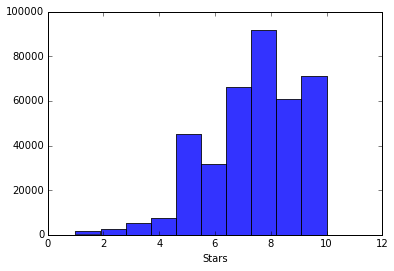

In [12]:
# Display the most common ratings
plt.hist(book_crossing.rating, bins=10, color='blue', alpha=0.8)
plt.xlabel("Stars")
plt.show()

What we see:

* there are too many not rated books (with 0 rating), i.e. zero rating tell us that a user read book (or only look at it), but did not rate it. This information does not contain any good for us

* people like a big part of books and evaluate them from 5 to 10 stars

* there a large percent of books rated with 10

ratings shape before removing: (433671, 3)
ratings shape after removing: (433671, 3)
persent of zero ratings: 0.0
0.00299711203416
(383852, 9)


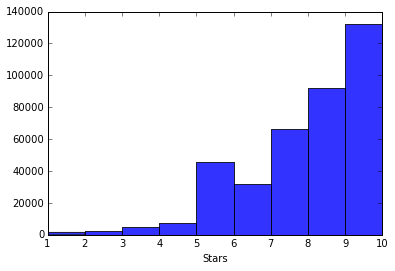

In [13]:
# Above analysis allows removing not rated books
x = ratings.shape
print "ratings shape before removing:", x
ratings = ratings[ratings.rating != 0]
print "ratings shape after removing:", ratings.shape

print "persent of zero ratings:", (1 - 1.0 * ratings.shape[0] / x[0]) * 100

fill_rate = (1.0 * ratings.shape[0] / len(ratings.user_id.drop_duplicates()) / len(ratings.book_id.drop_duplicates())) * 100
print fill_rate

book_crossing = pd.merge(pd.merge(ratings, books), users)
print book_crossing.shape

# Display the most common ratings
plt.hist(book_crossing.rating, bins=9, color='blue', alpha=0.8)
plt.xlabel("Stars")
plt.show()

What we see:

* after removing of nearby 62% of book/user pair with zero rating the fill_rate parameter was almost not changed

* we can work with a smaller dataset

In [ ]:
# Let's show top 20 authors by readers amount
top_authors = book_crossing.groupby('author')['rating'].count()
top_authors.sort_values(inplace=True, ascending=False)
top_authors[:20]

In [12]:
# Let's show top 20 authors by average rating
# We will consider here only those authors who has at least 50 readers
top_authors = book_crossing[book_crossing['author'].isin(top_authors[top_authors >= 50].index.values)].groupby('author')['rating'].mean()
top_authors.sort_values(inplace=True, ascending=False)
top_authors[:20]

author
Maud Hart Lovelace          9.288462
Art Spiegelman              9.240000
Bill Watterson              9.186186
Dr. Seuss                   9.178744
Shel Silverstein            9.158730
Antoine de Saint-Exupéry    9.029240
Bradley Trevor Greive       8.988095
Harper Lee                  8.985765
J. K. Rowling               8.970218
Clamp                       8.963303
J.R.R. TOLKIEN              8.897590
L.M. MONTGOMERY             8.889908
L.M. Montgomery             8.852632
E. B. White                 8.846154
WILLIAM GOLDMAN             8.818182
Nick Bantock                8.766871
MADELEINE L'ENGLE           8.762887
Betty Smith                 8.759259
Anne Frank                  8.752475
Lucy Maud Montgomery        8.745763
Name: rating, dtype: float64

user_id
11676     6943
98391     5691
189835    1899
153662    1845
23902     1180
235105    1020
76499     1012
171118     962
16795      959
248718     941
56399      838
197659     781
35859      777
185233     698
95359      606
114368     603
158295     567
101851     563
177458     524
204864     504
Name: book_id, dtype: int64


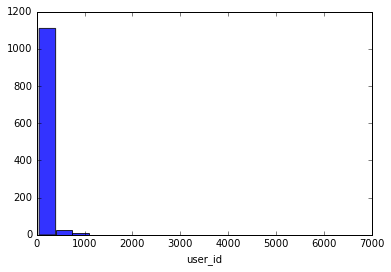

In [13]:
# Let's show top 20 users (i.e. who has rated the largest amount of books)
top_users = book_crossing.groupby('user_id')['book_id'].count()
top_users.sort_values(inplace=True, ascending=False)
print top_users[:20]

plt.hist(top_users[top_users>50], bins=20, color='blue', alpha=0.8)
plt.xlabel("user_id")
plt.show()

As we can see there are over 1000 user who read over 50 books. We will consider them further.

### 3. Matrix factorization

In [14]:
# Rating matrix is too large. We cannot work with it
print "Factorization matrix size: {} x {}".format(len(ratings.user_id.drop_duplicates()), len(ratings.book_id.drop_duplicates()))

Factorization matrix size: 77805 x 185973


In [15]:
# To decrease rating matrix size let's drop all books that has not numeric ID, eg. 034545104X
print "ratings shape before removing:", ratings.shape
ratings = ratings[ratings['book_id'].str.isnumeric()].reset_index().drop('index', axis=1)
print "ratings shape after removing:", ratings.shape

print "Factorization matrix size: {} x {}".format(len(ratings.user_id.drop_duplicates()), len(ratings.book_id.drop_duplicates()))

ratings shape before removing: (433671, 3)
ratings shape after removing: (397129, 3)
Factorization matrix size: 73763 x 170085


In [16]:
# Dataset is still too large.
# Let's take its sample by selection of those users who wsa rated at least 50 books
ratings = ratings[ratings['user_id'].isin(top_users[top_users > 50].index.values)].reset_index().drop('index', axis=1)
print "ratings shape:", ratings.shape
print "Factorization matrix size: {} x {}".format(len(ratings.user_id.drop_duplicates()), len(ratings.book_id.drop_duplicates()))
ratings.head()

ratings shape: (149936, 3)
Factorization matrix size: 1150 x 88250


,user_id,book_id,rating
0,277427,0060006641,10
1,277427,0060542128,7
2,277427,0061009059,9
3,277427,0062507109,8
4,277427,0132220598,8


In [17]:
# Even we have too large dataset
# Let's take a random sample of the last dataset
ratings = ratings.sample(frac=0.05, replace=True).reset_index().drop('index', axis=1)
print "ratings shape:", ratings.shape
print "Factorization matrix size: {} x {}".format(len(ratings.user_id.drop_duplicates()), len(ratings.book_id.drop_duplicates()))

ratings shape: (7497, 3)
Factorization matrix size: 1126 x 6687


In [18]:
# Add order identifiers to users and books
unique_users = list(ratings.user_id.drop_duplicates().values)
unique_books = list(ratings.book_id.drop_duplicates().values)

ratings['uid'] = 0
ratings['bid'] = 0
for i in xrange(ratings.shape[0]):
    ratings.loc[i, 'uid'] = unique_users.index(ratings.loc[i, 'user_id'])
    ratings.loc[i, 'bid'] = unique_books.index(ratings.loc[i, 'book_id'])
    
ratings.head()

,user_id,book_id,rating,uid,bid
0,201684,0679824081,8,0,0
1,235105,0312261837,9,1,1
2,17190,0684868911,10,2,2
3,242083,0440214041,9,3,3
4,123981,0451177096,8,4,4


In [30]:
# Putting "ratings" DataFrame data into a massive matrix
books_data = np.zeros([len(unique_users), len(unique_books)])
# Repalce the empty values into zeros
for d in ratings.values:
    books_data[d[3], d[4]] = d[2]
    
print "books_data", books_data.shape, "\n", books_data[:10]

# Let's separate those users who voted at least 500 times
sample = []
# Remember users IDs
users_ids = []
for i in xrange(books_data.shape[0]):
    nonzero = np.count_nonzero(books_data[i, :])
    if nonzero >= 25:
        sample.append(books_data[i, :])
        users_ids.append(i)

sample = np.array(sample)

print "sample =", sample.shape
print 'users_ids =', users_ids
print sample[:14, :10]

books_data (1126, 6687) 
[[  8.   0.   0. ...,   0.   0.   0.]
 [  0.   9.   0. ...,   0.   0.   0.]
 [  0.   0.  10. ...,   0.   0.   0.]
 ..., 
 [  0.   0.   0. ...,   0.   0.   0.]
 [  0.   0.   0. ...,   0.   0.   0.]
 [  0.   0.   0. ...,   0.   0.   0.]]
sample = (25, 6687)
users_ids = [1, 7, 12, 16, 17, 22, 28, 29, 36, 46, 67, 79, 97, 111, 137, 158, 179, 198, 212, 223, 228, 232, 244, 444, 476]
[[  0.   9.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.  10.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.  

As we can see the `sample` matrix is a very sparce matrix too. So, let's see how our algorithm will pull of this problem.

In [32]:
from time import time
start = time()

# Set numpy print parameters
np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)

# We will take on account all books
fP, fQ = RNMF(sample, 10, alpha=0.001, beta=0.001)
FM = getFM(fP, fQ, 1, 10)

print "Initial matrix:\n", sample[:10, :10]
print "\nFactorized matrix:\n", FM[:10, :10]
dur = time() - start
print "\nElapsed time {} min {} sec.".format(dur//60, round(dur%60, 1))

Initial matrix:
[[  0.   9.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.  10.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]]

Factorized matrix:
[[  6.17   8.99   6.49   5.93   7.7    4.49   5.37   7.98   5.74   6.71]
 [  6.7   10.49   8.62   7.1    8.47   5.23   5.53  10.     7.23   7.85]
 [  5.32   8.91   7.73   5.84   7.33   4.05   4.31   8.64   6.72   7.2 ]
 [  4.26   6.07   4.52   3.8    4.98   2.75   4.09   4.55   4.16   4.62]
 [  5.92   8.88   6.66   5.79   6.96   4.23   5.33   7.15   5.65   6.64]
 [  5.02   8.1    6.23   5.97   7.07   4.39   5.28   7.51   5.4    6

In [80]:
# Based on factorization matrix we can add recommendations now

# This function returns the list of `topn` books IDs
def get_recommendations(user_id, data, fact_matrix, topn=10):
    # Reset movies which user with "user_id" has already seen
    n = len(fact_matrix[0])
    for i in xrange(n):
        if data[user_id, i] != 0.0:
            fact_matrix[user_id, i] = 0.0
    topn_books = np.argsort(fact_matrix[user_id, :])[-topn:]
    topn_books = map(lambda x: unique_books[x], topn_books) 
    return topn_books

# This function returns the list of `topn` movies titles
def get_books_by_id(m):
    return books[books["book_id"].isin(m)]["title"].values

In [81]:
# Let's define the ID of the second user in `sample` matrix
uid = users_ids[5]
user_id = unique_users[uid]
print user_id

35859


In [82]:
# And display recommended movies
rec_books_ids = get_recommendations(5, sample, FM, topn=50)
print rec_books_ids[:10]

rec_books = get_books_by_id(rec_books_ids)
rec_books[:10]

['0767912241', '034544282', '2020126540', '0671708635', '0740713906', '0440214114', '0373484836', '0449217213', '0451185994', '0618129030']


array([ 'Like Water for Chocolate: A Novel in Monthly Installments, With Recipes, Romances, and Home Remedies',
       'Good in Bed', 'Engaging The Enemy',
       'Seven Habits Of Highly Effective People', 'JUDY GARLAND',
       'Born Free: A Lioness of Two Worlds',
       'The Gunslinger (The Dark Tower, Book 1)', 'Valentine Pontifex',
       'Mixed Blessings',
       'Excuse Me While I Wag : A Dilbert Book (Adams, Scott, Dilbert Book.)'], dtype=object)

In [83]:
# Let's display full data for these books
top20 = books[books.book_id.isin(rec_books_ids)]
top20.head(10)

,book_id,title,author,year,publisher
779,0385420161,Like Water for Chocolate: A Novel in Monthly I...,Laura Esquivel,1992,Doubleday Books
1496,0743418174,Good in Bed,Jennifer Weiner,2002,Washington Square Press
1787,0373218192,Engaging The Enemy,Nora Roberts,2003,Silhouette
2212,0671708635,Seven Habits Of Highly Effective People,Stephen R. Covey,1990,Free Press
2679,0671802283,JUDY GARLAND,Anne E. Edwards,1975,Pocket
4483,0375714383,Born Free: A Lioness of Two Worlds,Joy Adamson,2000,Pantheon Books
11104,0451160525,"The Gunslinger (The Dark Tower, Book 1)",Stephen King,1994,New American Library
12637,0553244949,Valentine Pontifex,Robert Silverberg,1995,Spectra Books
13647,0440214114,Mixed Blessings,DANIELLE STEEL,1993,Dell
14354,0740713906,"Excuse Me While I Wag : A Dilbert Book (Adams,...",Scott Adams,2001,Andrews McMeel Publishing


In [84]:
# Let's display all book ever read by user 56399
user35859 = book_crossing[(book_crossing.user_id == user_id) & (book_crossing.book_id.str.isnumeric())]
user35859

,user_id,book_id,rating,title,author,year,publisher,location,age
14819,35859,0684867621,6,The Girl Who Loved Tom Gordon : A Novel,Stephen King,1999,Scribner,"duluth, minnesota, usa",NaN
14821,35859,0874869870,8,She Said Yes: The Unlikely Martyrdom of Cassie...,Misty Bernall,1999,Plough Publishing House,"duluth, minnesota, usa",NaN
14822,35859,0345342968,10,Fahrenheit 451,RAY BRADBURY,1987,Del Rey,"duluth, minnesota, usa",NaN
14823,35859,0345452550,7,A Cold Heart: An Alex Delaware Novel,JONATHAN KELLERMAN,2003,Ballantine Books,"duluth, minnesota, usa",NaN
14824,35859,0553285920,8,Silent Partner (Alex Delaware Novels (Paperback)),Jonathan Kellerman,1990,Bantam Books,"duluth, minnesota, usa",NaN
14827,35859,0394925696,8,Winnie the Pooh and Tigger Too,A. A. Milne,1976,Random House Children's Books,"duluth, minnesota, usa",NaN
14829,35859,0717283194,6,Disney's: The Little Mermaid (Disney's Wonderf...,Walt Disney,0,Stoddart+publishing,"duluth, minnesota, usa",NaN
14830,35859,0717283208,7,Prince and the Pauper Walt Disney,Disney,1993,Stoddart+publishing,"duluth, minnesota, usa",NaN
14831,35859,0717284972,6,Disney's Pocahontas (Disney's Wonderful World ...,Walt Disney,1995,Grolier Book Club Edition,"duluth, minnesota, usa",NaN
14832,35859,0312195516,10,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,"duluth, minnesota, usa",NaN


In [85]:
# Let's look at does we reccomend only authors that the user ever read.
# If yes, then it will be bad recommendations, because we won't propose anything new for the user
user35859_authors = user35859['author'].drop_duplicates()
for a in top20['author'].values:
    if a in user56399_authors.values:
        print a

Stephen King
Agatha Christie
Mark Twain


In [90]:
user35859_years = user35859['year'].drop_duplicates()
print user35859_years.median()
print top20['year'].drop_duplicates().median()

1984.5
1994.5


What we see:
 
* the selected user likes books of the modern authors and we reccomend him also modern authors.

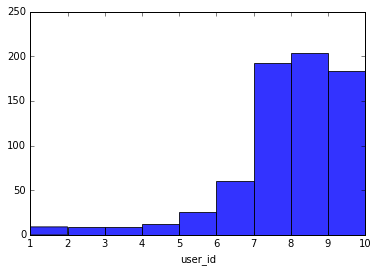

In [101]:
# Let's look how the selected user rated books
plt.hist(user35859.rating, bins=9, color='blue', alpha=0.8)
plt.xlabel("user_id")
plt.show()

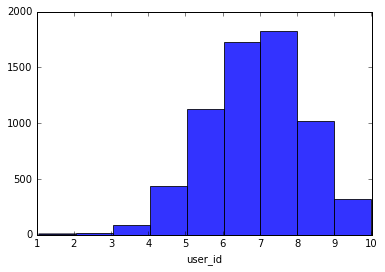

In [100]:
x = FM[5, :][np.where((FM[5, :] >= 1) & (FM[5, :] <= 10))]
plt.hist(x, bins=9, color='blue', alpha=0.8)
plt.xlabel("user_id")
plt.show()

What we see:

* the selected user rated books with marks from 6 to 10 in most cases and the predicted results have the same tendency. 